<a href="https://colab.research.google.com/github/dhootradhika/Sales-Performance-Analysis/blob/main/RAY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color ="071013"> Project : Bank Marketing Dataset Analysis**

##  <font color="#003C71"> **Table of Contents:** </font>
<hr>

<font color = "#2d3142">**1 Introduction:** </font>

*	<font color = "#427AA1"> Background and Overview of the Dataset </font>
*	<font color = "#427AA1"> Business Problem Statement </font>

<font color = "#2d3142">**2 Import Libraries**</font>

<font color = "#2d3142">**3 Connecting to google drive**</font>

<font color = "#2d3142">**4 data collection (Load the Dataset):** </font>

*	<font color = "#427AA1">Inspect the dataset structure( shape, columns, info(), {describe()[on numerical columns]} ) </font>

<font color = "#2d3142">**5 Data Cleaning:**</font>

*	<font color = "#427AA1">Standardize columns names </font>
*	<font color = "#427AA1">Counting how many missing values are there in dataset</font>
*	<font color = "#427AA1">Handling "unknown" values</font>
*	<font color = "#427AA1">Check unique values</font>
*	<font color = "#427AA1">replacing all "unknown" values with Nan</font>
*	<font color = "#427AA1">replacing NaN values of job, contact, education, poutcome columns</font>
*	<font color = "#427AA1">Re-checking all NaN values we have left (0)</font>
*	<font color = "#427AA1">Handling pdays(999 -> -1)</font>

<font color = "#2d3142">**6 Preprocessing:** </font>

*	<font color = "#427AA1">Remove duration(Data Leakage) </font>

<font color = "#2d3142">**7 EDA:** </font>

*	<font color = "#427AA1">Visualize Target Variable</font>
*	<font color = "#427AA1">Univariate Analysis ( on numerical columns)</font>
*	<font color = "#427AA1">Boxplots( Outlier detection and their total count)</font>
*	<font color = "#427AA1">Outlier treatment</font>
*	<font color = "#427AA1">Checking class distribution(imbalance)</font>

<font color = "#2d3142">**8 Feature Encoding and Scaling:**</font>

*	<font color = "#427AA1">Separate predictors and target variables</font>
*	<font color = "#427AA1">Separate Numerical and categorical Columns</font>
*	<font color = "#427AA1">Encode Categorical Data</font>
*	<font color = "#427AA1">Train-Test Split</font>
*	<font color = "#427AA1">Feature Scaling (Min-Max Scaling)</font>

<font color = "#2d3142">**9 Machine Learning Algorithm:**</font>

*	<font color = "#427AA1">9.1 Decision Tree Classifier:</font> <font color = "75abbc">- Initializing and Training the Decision Tree Model
 				 - Visualization of the Decision Tree
 				 - Model Evaluation</font>

*	<font color = "#427AA1">9.2 Random Forest Classifier:</font> <font color = "#75abbc">- Initializing and Training the Random Forest Model - Model Evaluation</font>

*	<font color = "#427AA1">9.3 Support Vector Machine (SVM):</font> <font color = "#75abbc">- Initializing and Training the Support Vector Machine model
 				     - Model Evaluation</font>

<font color = "#2d3142">**10 Results and Model Comparison:**</font>

* <font color = "#427AA1">Performance and Comparison of Models</font>
*	<font color = "#427AA1">Discussion of Results</font>
<hr>
    


# **<font color = "#2d3142">1 Introduction**
---

### <font color = "#427AA1">**Background and Overview of the Dataset :-** </font>

**a. The dataset contains multiple attributes describing clients, their financial profile, and details of marketing campaigns conducted by a Portuguese bank. The primary features include:**

* **Age:** Age of the client.
* **Job:** Type of job or occupation.
* **Marital:** Marital status of the client.
* **Education:** Education level.
* **Default:** Whether the client has credit in default.
* **Balance:** Average yearly balance in euros.
* **Housing:** Whether the client has a housing loan.
* **Loan:** Whether the client has a personal loan.
* **Contact:** Communication type used (telephone or cellular).
* **Month:** Month of last contact.
* **Day_of_week:** Day of the week of last contact.
* **Duration:** Duration of the last contact in seconds.
* **Campaign:** Number of contacts during the current campaign.
* **Pdays:** Days since the client was last contacted in a previous campaign.
* **Previous:** Number of contacts in previous campaigns.
* **Poutcome:** Outcome of the previous campaign.
* **y:** Whether the client subscribed to a term deposit.


**b. Most of the attributes in this dataset are qualitative (categorical), while several others are quantitative (numerical).**

**Categorical attributes include:**
job, marital, education, default, housing, loan,
 contact, month, day_of_week, poutcome, y (target)

**Numerical attributes include:**
age, balance, duration, campaign, pdays, previous

**c.The features and their possible values include:**

**Categorical Variables:**

* Job ∈ [admin., blue-collar, technician, services, management, retired, self-employed, unemployed, student, housemaid, entrepreneur, unknown]
* Marital ∈ [married, single, divorced, unknown]
* Education ∈ [primary, secondary, tertiary, unknown]
* Default ∈ [yes, no, unknown]
* Housing ∈ [yes, no, unknown]
* Loan ∈ [yes, no, unknown]
* Contact ∈ [cellular, telephone]
* Month ∈ [jan, feb, mar, …, nov, dec]
* Day_of_week ∈ [mon, tue, wed, thu, fri]
* Poutcome ∈ [success, failure, nonexistent]

**Numerical Variables:**

* Age ∈ [18 to 95+]
* Balance ∈ [varies; includes negative and positive balances]
* Duration ∈ [seconds]
* Campaign ∈ [number of contacts in current campaign]
* Pdays ∈ [−1 or 0–999]
* Previous ∈ [0 to higher counts]

**d. The target attribute (class label) is: Y ∈ [yes, no]**
* <yes: client subscribed to a term deposit
* no: client did not subscribe

### <font color = "#427AA1">  **Business Problem Statement :-**

**A Portuguese bank conducted several direct marketing campaigns via phone calls to convince clients to subscribe to a term deposit. Marketing calls are expensive and time-consuming, and many clients do not respond positively.**

**The bank wants to improve campaign efficiency by identifying which customers are most likely to subscribe.**

# <font color="#2d3142"> **2 Import libraries**
---

In [ ]:

import warnings as w
w.filterwarnings("ignore")
import pandas as pd
import numpy as np

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


**Comments:**

* warnings – Used to suppress warning messages for cleaner output.
* pandas – Used for data loading, manipulation, and analysis.
* numpy – Used for numerical computations and array operations.
* sklearn – Machine learning library used for model building and evaluation.
* tree, DecisionTreeClassifier – Used to build decision tree classification models.
* preprocessing, LabelEncoder – Used for data preprocessing and encoding categorical variables.
* model_selection, train_test_split – Used to split data into training and testing sets.
* metrics – Used to evaluate model performance.
* accuracy_score, precision_score, recall_score, f1_score – Used to measure classification performance.
* classification_report, confusion_matrix – Used for detailed evaluation of classification results.
* RandomForestClassifier – Used to build an ensemble-based random forest model.
* SVM – Intended for Support Vector Machine model implementation.

# <font color = "#2d3142"> **3 Connecting to google drive**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Comment :** Imports Google Drive module and mounts the user’s Google Drive to Google Colab, allowing access to files stored in Drive.

# <font color = "#2d3142"> **4 Data Collection (Load the Dataset)**
---

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/bank_full.csv')


**Comment :** Loads the Bank Marketing dataset from Google Drive into a pandas DataFrame for analysis.

### <font color = "#427AA1"> **Inspect the dataset structure**

---
<font color = "#427AA1">Goal: understand size, columns, dtypes, missing values.



In [ ]:
df.shape

(45211, 17)

**Comment :** Shows the dataset contains 45,211 rows and 17 columns.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Comment :** Displays the names of all features, including client attributes and the target variable y.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Comment :** Provides an overview of data types and confirms how many missing values are there.

In [ ]:
new_df = df[['age', 'balance', 'campaign']]

new_df.describe()

,age,balance,campaign
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841
std,10.618762,3044.765829,3.098021
min,18.000000,-8019.000000,1.000000
25%,33.000000,72.000000,1.000000
50%,39.000000,448.000000,2.000000
75%,48.000000,1428.000000,3.000000
max,95.000000,102127.000000,63.000000


**Comment :** Generates summary statistics, showing average client age (~41), wide variation in account balance (including negatives), and that most clients were contacted 1–3 times during a campaign.

# <font color = "#2d3142"> **5 Data Cleaning**
---

### <font color ="#427AA1">**Standardize column names**

---
<font color ="#427AA1">Goal: remove quotes, spaces, uppercase, weird characters.


In [ ]:
#  Remove extra spaces at the beginning or end
df.columns = df.columns.str.strip()

In [ ]:
#  Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

**Comment :** Cleans column names by removing leading/trailing spaces and replacing spaces with underscores for consistency.

In [ ]:
# Counts how many missing values are in each column.
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**Comment :** Checks and displays the number of missing values in each column, confirming data completeness.

### <font color ="#427AA1">**Handling “unknown” values**

---
<font color ="#427AA1">The bank marketing dataset often uses the word "unknown" instead of missing values, so we must detect and replace them.


In [ ]:
# Counts how many times "unknown" appears.
(df == "unknown").sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


**Comment :** Reveals that variables like job, education, contact, and poutcome contain many “unknown” entries, indicating missing or unavailable information that requires preprocessing before modeling.

In [ ]:
# Total unknown count
(df == "unknown").sum().sum()

np.int64(52124)

**Comment :** Calculates the total number of “unknown” entries across the dataset (52,124), highlighting the extent of missing-like data.

In [ ]:
# check unique
# Identifies all categorical columns for further analysis or preprocessing.
cat_cols = df.select_dtypes(include='object').columns

# Loops through categorical columns to create unique_df showing:
# Column_Name – Name of the categorical feature.
# Unique_Values – All distinct values in the column.
# Unique_Count – Number of unique categories.

unique_data = []
for col in cat_cols:
    unique_data.append({
        "Column_Name": col,
        "Unique_Values": df[col].unique(),
        "Unique_Count": df[col].nunique()
    })

unique_df = pd.DataFrame(unique_data)
unique_df


,Column_Name,Unique_Values,Unique_Count
0,job,"[management, technician, entrepreneur, blue-co...",12
1,marital,"[married, single, divorced]",3
2,education,"[tertiary, secondary, unknown, primary]",4
3,default,"[no, yes]",2
4,housing,"[yes, no]",2
5,loan,"[no, yes]",2
6,contact,"[unknown, cellular, telephone]",3
7,month,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ...",12
8,poutcome,"[unknown, failure, other, success]",4
9,y,"[no, yes]",2


**Observations:**

* Columns like job, education, contact, and poutcome contain “unknown” values.
* Most other categorical features have limited, well-defined categories suitable for encoding.

### <font color ="#427AA1">**Replacing all "unknown" values with NaN**

---

<font color ="#427AA1"> Replaces all “unknown” values with NaN to standardize missing data.

In [ ]:
df.replace('unknown', np.nan, inplace=True)

**Count of missing values in the job column BEFORE imputation.**

In [ ]:
job_na_count = (df['job'].isna().sum())
print(job_na_count)

288


In [ ]:
df['job'].fillna(method='bfill', limit=2, inplace=True)

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,management,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


**Comment :** job – Backward fill with a limit of 2 to propagate nearest valid values.

**Count of missing values in the job column AFTER imputation.**

In [ ]:
job_na_count = (df['job'].isna().sum())
print(job_na_count)

0


**Count of missing values in the contact column BEFORE imputation.**

In [ ]:
contact_na_count = (df['contact'].isna().sum())
print(contact_na_count)

13020


In [ ]:
df['contact'].fillna(method='bfill', inplace=True)

df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,management,single,NaN,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no


**Comment :** contact – Backward fill to replace missing contact types.

**Count of missing values in the contact column AFTER imputation.**

In [ ]:
contact_na_count = (df['contact'].isna().sum())
print(contact_na_count)

0


**Count of missing values in the education column BEFORE imputation.**

In [ ]:
education_na_count = (df['education'].isna().sum())
print(education_na_count)

1857


In [ ]:
df['education'].fillna(method='ffill', inplace=True)

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,management,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no


**Comment :** education – Forward fill to propagate the previous valid education level.

**Count of missing values in the poutcome column BEFORE imputation.**

In [ ]:
poutcome_na_count = (df['poutcome'].isna().sum())
print(poutcome_na_count)

36959


In [ ]:
df['poutcome'].fillna(method='bfill', inplace=True)

df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,management,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no


**Comment :** poutcome – Backward fill to replace missing previous campaign outcomes.

**Count of missing values in the poutcome column AFTER imputation.**

In [ ]:
poutcome_na_count = (df['poutcome'].isna().sum())
print(poutcome_na_count)

0


**Verifying that all categorical columns contain valid entries, thereby preparing the dataset for subsequent analysis or encoding.**

In [ ]:
# Checking how many NaN values we have
print(df.isna().sum(),end = " ")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64 

**Comment :** Confirms that all missing values (NaN) have been handled; no column has remaining nulls.

### <font color ="#427AA1">**Handling pdays**

---

- <font color ="#427AA1"> pdays is usually a column in marketing datasets (like bank campaigns) that tells how many days ago a client was last contacted.

- <font color ="#427AA1">999 in pdays → usually means the client was never contacted.

- <font color ="#427AA1">We don’t want 999 to be treated as a real number, because it will mess up statistics (like mean or median).


In [ ]:
if 'pdays' in df.columns:
    # Replace 999 with -1
    df['pdays'] = df['pdays'].replace(999, -1)

#Why -1?
#It clearly tells us "this client was never contacted."
#Easier for analysis than keeping 999, which looks like a real number.

**Comment :** Replacing 999 with -1 to indicate clients who were never contacted, preventing statistical distortion and making analysis more meaningful.

# <font color = "#2d3142"> **6 PREPROCESSING**
---

### <font color ="#427AA1">**Remove duration (Data Leakage)**

---

**<font color ="#427AA1">Data leakage explanation:** Using duration would give the model information that is only known after the call, which artificially inflates performance.

<font color ="#427AA1">Removes the duration column to ensure predictions are made fairly based only on information available before contacting the client.

In [ ]:
# Remove duration column because it leaks information
df.drop('duration', axis=1, inplace=True)

# **<font color = "#2d3142">7 EDA**


### <font color = "#427AA1">**Visualize Target Variable**

---
<font color = "#427AA1">**Purpose**

<font color = "#427AA1">To check:

* <font color = "#427AA1">how many customers said Yes

* <font color = "#427AA1">how many customers said No
This helps us understand class balance.


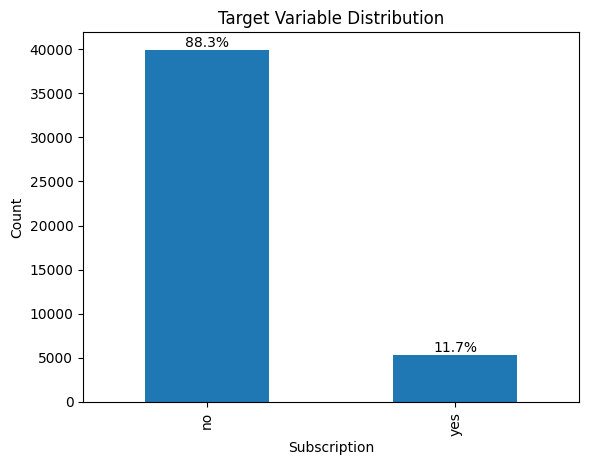

In [ ]:
import matplotlib.pyplot as plt

counts = df['y'].value_counts()
percentages = df['y'].value_counts(normalize=True) * 100

ax = counts.plot(kind='bar')

for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count, f'{pct:.1f}%', ha='center', va='bottom')

plt.title('Target Variable Distribution')
plt.xlabel('Subscription')
plt.ylabel('Count')

plt.show()


**Comment :** Reveals that the dataset is highly imbalanced, with far more “No” responses than “Yes,” indicating that only a small fraction of clients subscribed to the term deposit.

### <font color = "#427AA1">**Univariate Analysis**

---



<font color = "#427AA1">**A) Numerical Columns**

<font color = "#427AA1">Purpose

<font color = "#427AA1">Understand distribution, skewness, outliers.

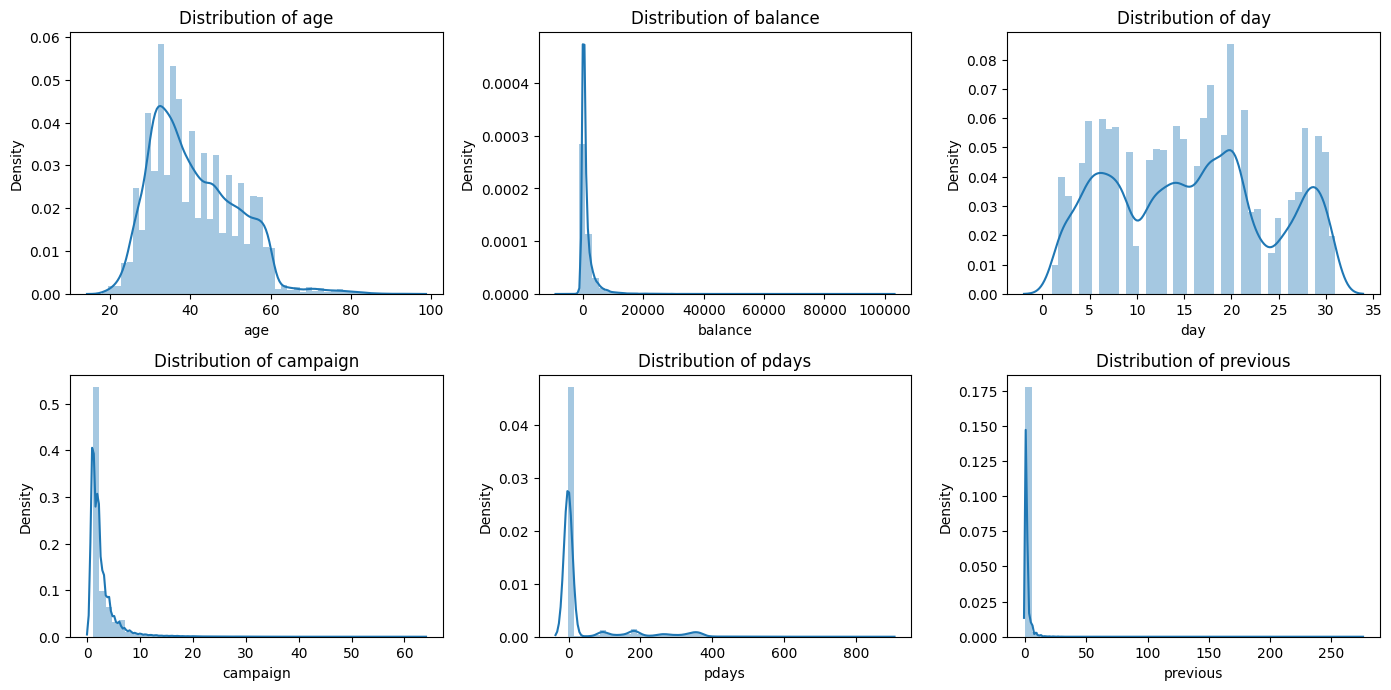

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [col for col in df.select_dtypes(include='number').columns
            if col != 'balance_log']

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<font color = "#427AA1">it is used to understand the distribution of numerical variables

**Insight:** Helps decide if scaling, transformation, or outlier handling is needed before modeling.

### <font color = "#427AA1"> **Boxplots (Outlier Detection)**

---



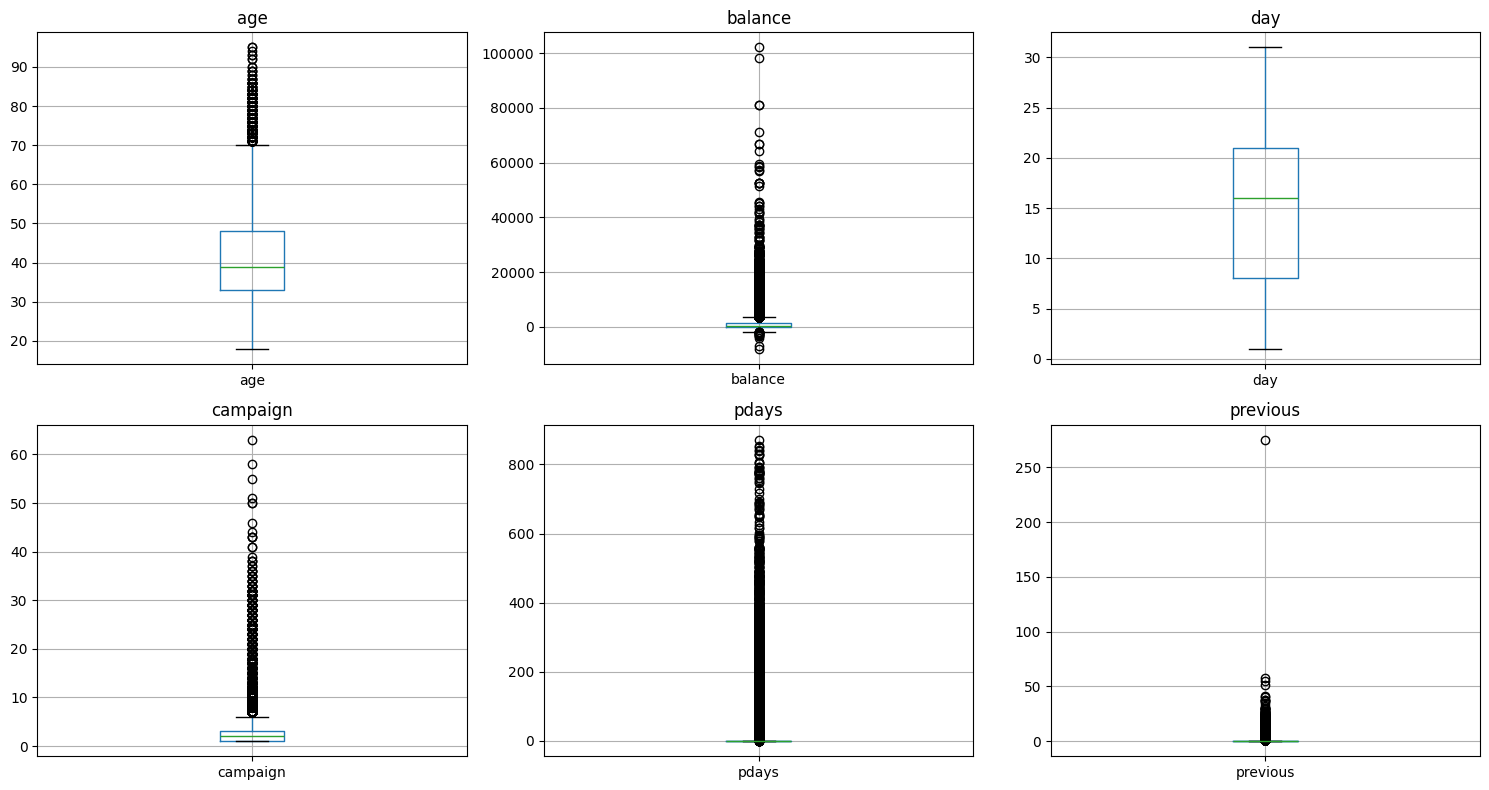

In [ ]:
# Loop through numeric columns to show boxplots (outliers)
import matplotlib.pyplot as plt

# Get numeric columns
num_cols = df.select_dtypes(include='number').columns
-
# Set up the figure
fig, axes = plt.subplots(nrows=(len(num_cols)+2)//3, ncols=3, figsize=(15, 8))  # 3 plots per row
axes = axes.flatten()  # Flatten in case grid > number of columns

# Loop through each numeric column and plot boxplot
for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Loop runs for each numeric column
#boxplot() → shows data spread and outliers
#Middle line → median
#Box → interquartile range (IQR)
#Dots outside → outliers
#plt.show() → displays each boxplot separately

<font color = "#427AA1">boxplots helped identify potential outliers and data spread across features.

In [ ]:

# Count outliers using IQR (numeric confirmation)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    print(f"{col}: {len(outliers)} outliers")


age: 487 outliers
balance: 4729 outliers
day: 0 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers


**Observations:**
* age – 487 outliers
* balance – 4,729 outliers
* campaign – 3,064 outliers
* pdays & previous – 8,257 outliers each
* day – no outliers

**Insight:** Outliers are significant in several features and may require treatment or robust modeling techniques.



### <font color = "#427AA1"> **Outlier Treatment**
---

<font color = "#427AA1">**Performing outlier treatment to reduce the impact of extreme values**

In [ ]:
df['age'] = df['age'].clip(lower=18, upper=90)

**Comment :** Outliers (very high ages) are valid; capped between 18–90 to reduce extreme influence.

In [ ]:
cap = df['campaign'].quantile(0.95)
df['campaign'] = df['campaign'].clip(upper=cap)


**Comment :** Campaign: High number of contacts can distort analysis; capped at 95th percentile to limit extreme values.The campaign variable was capped at the 95th percentile to mitigate the influence of extreme contact frequencies while preserving the underlying distribution for the majority of observations.

In [ ]:
df['pdays_contacted'] = np.where(df['pdays'] == -1, 'no', 'yes')
df['pdays_contacted'] = df['pdays_contacted'].map({'no': 0, 'yes': 1})


**Comment :** Pdays: -1 indicates never contacted; converted into a binary categorical feature (pdays_contacted) for modeling.

In [ ]:
df['previous'] = df['previous'].clip(upper=df['previous'].quantile(0.95))


**Comment :** Previous: Skewed due to many zeros; capped at 95th percentile to reduce extreme effect.The previous variable, which is heavily zero-inflated and right-skewed, was capped at the 95th percentile to reduce the influence of extreme values while preserving the dominant distributional pattern.

In [ ]:
df['y'].value_counts(normalize=True)


,proportion
y,
no,0.883015
yes,0.116985


**Comment :** Target y: Binary variable—outlier analysis does not apply; focus instead on class imbalance.

### <font color = "#427AA1">**DATA IMBALANCING**

<font color = "#427AA1">Check Class Distribution

In [ ]:
(df['y'].value_counts(normalize=True) * 100).round(2)


,proportion
y,
no,88.3
yes,11.7


**Insight:** Target distribution is highly imbalanced, confirming earlier observation that few clients subscribed to term deposits.

# <font color = "#2d3142">**8 Feature Encoding & Scaling**
---

### <font color = "#427AA1">**Separate predictors and target variables**
---
<font color = "#427AA1">Separating features (X) and target (y) for modeling.

In [ ]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']


### <font color = "#427AA1">**Separate Numerical & Categorical Columns**

In [ ]:
num_cols = X.select_dtypes(include='number').columns

cat_cols = X.select_dtypes(include='object').columns


<font color = "#427AA1">Identifies numerical and categorical columns in X.

### <font color = "#427AA1">**Encode Categorical Data**

* <font color = "#427AA1">Encodes categorical features using one-hot encoding (pd.get_dummies) with drop_first=True to avoid multicollinearity.

* <font color = "#427AA1">Target variable y remains as-is (binary: yes/no) for classification.

* <font color = "#427AA1">Result: X_encoded_df is fully numeric and ready for model training.

In [ ]:
X_encoded_df = pd.get_dummies(X, columns=cat_cols, drop_first=True).astype(int)
y_encoded_df = y
X_encoded_df.tail(10)


,age,balance,day,campaign,pdays,previous,pdays_contacted,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
45201,53,583,17,1,184,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45202,34,557,17,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45203,23,113,17,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45204,73,2850,17,1,40,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45205,25,505,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45208,72,5715,17,5,184,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45209,57,668,17,4,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
45210,37,2971,17,2,188,3,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


### <font color = "#427AA1"> **Train–Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df,
    y_encoded_df,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded_df
)


* <font color = "#427AA1">Splits the dataset into training (80%) and testing (20%) sets for model evaluation.

* <font color = "#427AA1">Uses stratify=y_encoded_df to maintain the same class distribution in both sets, important due to target imbalance.

In [ ]:
X_train.shape, X_test.shape

((36168, 38), (9043, 38))

<font color = "#427AA1">Resulting shapes:

<font color = "#427AA1">X_train: 36,168 rows × 38 features

<font color = "#427AA1">X_test: 9,043 rows × 38 features

## **Justification:**

**The train–test split is performed before scaling to prevent data leakage. The Min–Max scaler is fitted only on the training set, so the test set remains completely unseen and unbiased. This ensures that information from the test data does not influence the scaling process, giving a realistic evaluation of model performance.**

**Key points:**

* **Scaling after splitting prevents the model from "peeking" at test data statistics.**

* **The same scaler (fitted on training data) is used to transform both train and test sets.**

* **Maintains proper evaluation metrics and model generalization.**

### <font color = "#427AA1">**Feature Scaling (Min-Max Scaling)**

<font color="#427AA1">Feature scaling ensures that numerical variables contribute equally to the model by transforming them onto a common scale.</font>

<font color="#427AA1">Min–Max Scaling</font>

<font color="#427AA1">This technique rescales features to a fixed range using the following formula:</font>

<font color="#427AA1"> \( X_{\text{scaled}} = \dfrac{ X - X_{\min}}{X_{\max} - X_{\min} } \) </font>

<font color="#427AA1">After scaling:</font>

<font color="#427AA1">• The minimum value becomes 0</font>

<font color="#427AA1">• The maximum value becomes 1</font>

In [ ]:
# Continuous features
continuous_cols = ['age', 'balance', 'campaign','pdays', 'previous']

from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

<font color = "#427AA1">Min-Max Scaling was applied to numerical features after train-test splitting to normalize values between 0 and 1, ensuring equal contribution of features and preventing scale dominance.

**Comments:**

* Applies Min-Max scaling to continuous numerical features (age, balance, campaign, pdays, previous) to transform all values into the 0–1 range.

* Replaces any inf/-inf values and fills NaNs with the median from the training set to avoid errors.

* Fit the scaler on X_train and transform both X_train and X_test to prevent data leakage.

* Ensures all numerical features contribute equally during model training and prevents scale-related bias.

# <ont color ="#2d3142">**9 Machine Learning Algorithm:**
---

### <font color="#427AA1">**9.1 Decision Tree classifier**

### <font color="#75abbc"> **Initializing and Training Decision Tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize & train Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

### <font color="#75abbc">**Visualization of the Decision Tree**

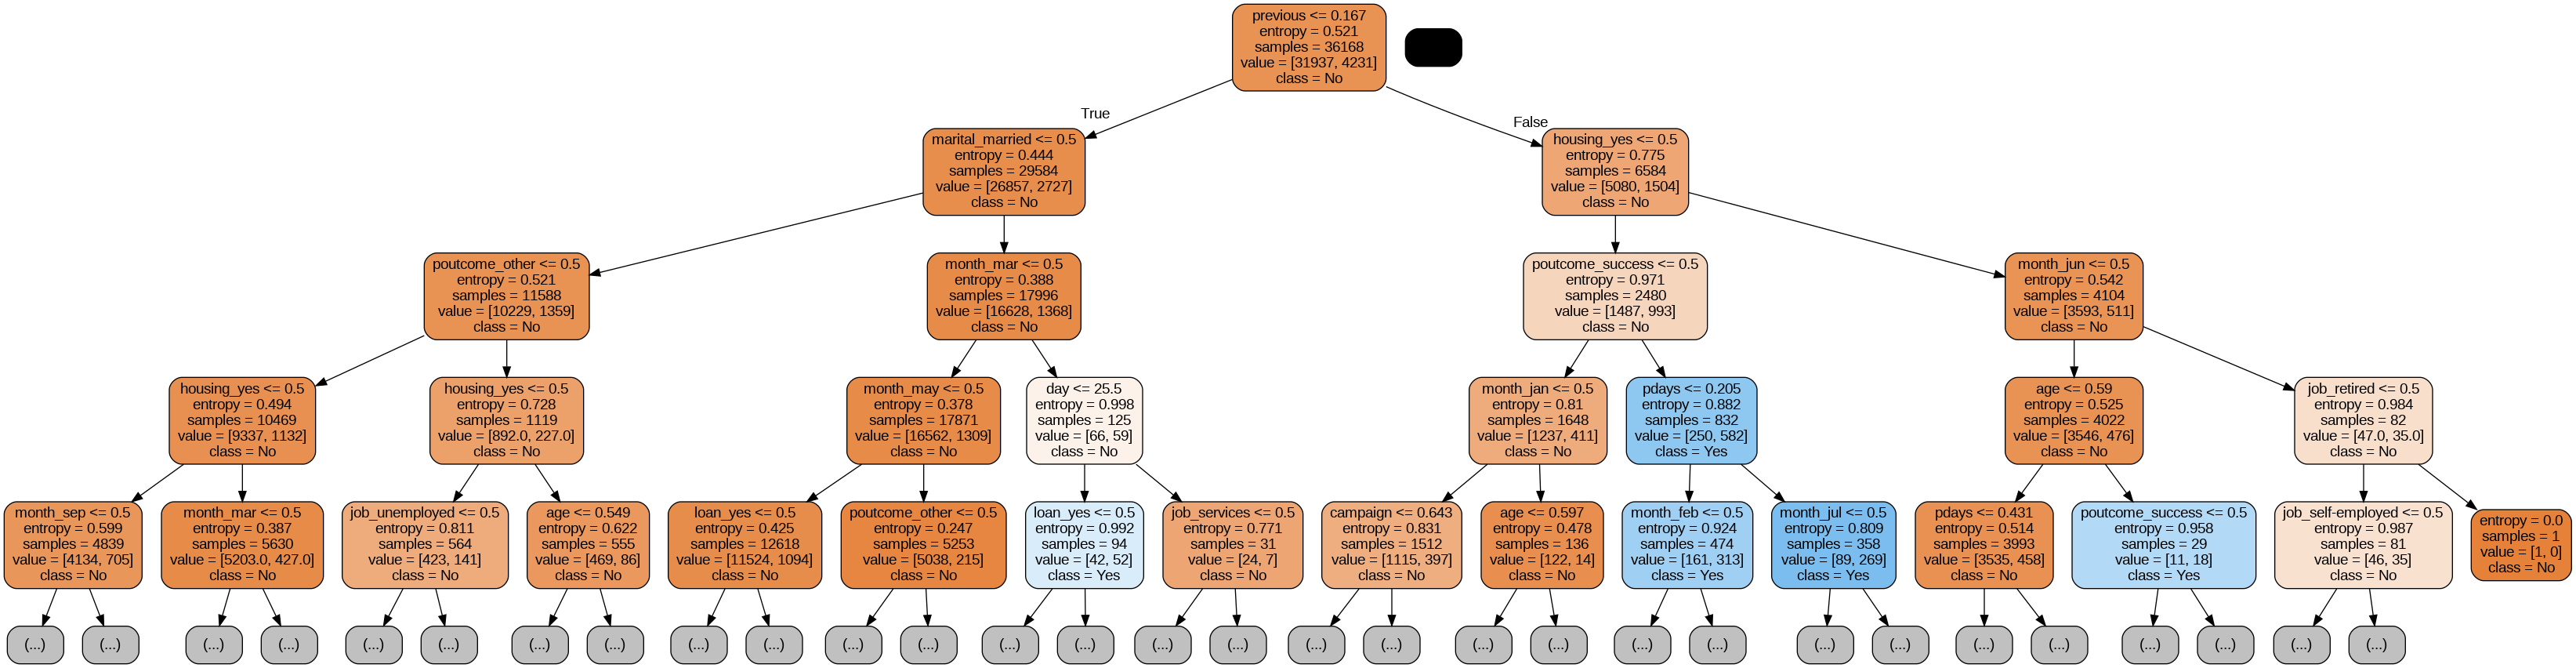

In [ ]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    feature_names=X_encoded_df.columns,
    class_names=['No', 'Yes'],
    rounded=True,
    filled=True,
    max_depth=4
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
# Generate predictions for the test dataset using the trained Decision Tree model
y_test_pred = dt.predict(X_test)


### <font color="#75abbc">**Model Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Accuracy: 0.8361163330753069

Confusion Matrix:
 [[7247  738]
 [ 744  314]]

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.91      0.91      7985
         yes       0.30      0.30      0.30      1058

    accuracy                           0.84      9043
   macro avg       0.60      0.60      0.60      9043
weighted avg       0.84      0.84      0.84      9043



**Confusion Matrix:**

* True Negatives (No predicted as No): 7,247
* False Positives: 738
* False Negatives: 744
* True Positives (Yes predicted as Yes): 314

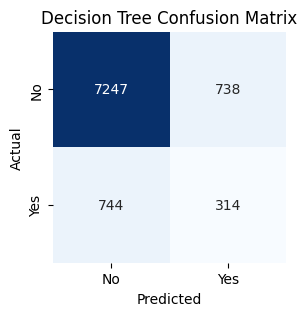

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
# The test feature set is combined with the actual and predicted target values to facilitate inspection of model
# predictions. The first 10 rows are displayed for a quick overview.
test_results = X_test.copy()
test_results['Actual_y'] = y_test
test_results['Predicted_y'] = y_test_pred

print(test_results.head(10))


            age   balance  day  campaign     pdays  previous  pdays_contacted  \
1392   0.305556  0.078614    8  0.142857  0.000000  0.000000                0   
7518   0.361111  0.076235   30  0.142857  0.000000  0.000000                0   
12007  0.180556  0.076035   20  0.571429  0.000000  0.000000                0   
5536   0.250000  0.078750   23  0.428571  0.000000  0.000000                0   
29816  0.222222  0.090244    4  0.000000  0.000000  0.000000                0   
18275  0.319444  0.083135   31  1.000000  0.000000  0.000000                0   
8543   0.347222  0.096309    3  0.285714  0.000000  0.000000                0   
43965  0.638889  0.073793   23  0.000000  0.259174  0.666667                1   
28083  0.236111  0.089173   28  0.142857  0.000000  0.000000                0   
25787  0.361111  0.093494   19  0.000000  0.168578  0.333333                1   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
1392                 1           

### <font color ="#427AA1">**9.2 Random Tree Classifier**

### <font color="#75abbc"> **Initializing & training Random Forest classifier**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,            # limit depth
    min_samples_split=10,   # require at least 10 samples to split
    min_samples_leaf=5,     # minimum 5 samples per leaf
    criterion='entropy',
    max_features='sqrt',
    random_state=42,
    oob_score=True
)

In [ ]:
# Train the Random Forest model
rf_train = rf.fit(X_train, y_train)


In [ ]:
# Predict target values for the test dataset using the trained Random Forest model
y_test_pred = rf.predict(X_test)

# Assign predicted and true labels to descriptive variables for evaluation
y_test_pred_labels = y_test_pred
y_test_labels = y_test



### <font color = "#75abbc">**Model Evaluation**

In [ ]:
print("OOB Score:", rf_train.oob_score_)
print("\nTest Accuracy:", accuracy_score(y_test_labels, y_test_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_test_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_test_pred_labels))


OOB Score: 0.8918104401681044

Test Accuracy: 0.8920712153046555

Confusion Matrix:
 [[7932   53]
 [ 923  135]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7985
         yes       0.72      0.13      0.22      1058

    accuracy                           0.89      9043
   macro avg       0.81      0.56      0.58      9043
weighted avg       0.87      0.89      0.86      9043



**Confusion Matrix:**

* True Negatives (No predicted as No): 7,932
* False Positives: 53
* False Negatives: 923
* True Positives (Yes predicted as Yes): 135

**Insight:** Random Forest improves overall accuracy and reduces false positives for the majority class but still struggles with minority class (Yes), indicating the need for class imbalance handling (e.g., SMOTE, class weights).

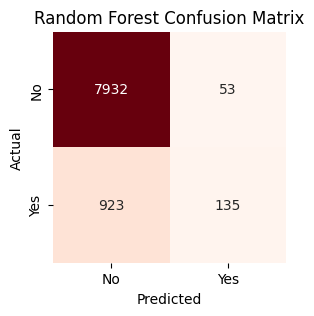

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Plot heatmap
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
# The test feature set is combined with the actual and predicted target values to facilitate inspection of model
# predictions. The first 10 rows are displayed for a quick overview.
test_results = X_test.copy()
test_results['Actual_y'] = y_test
test_results['Predicted_y'] = y_test_pred

print(test_results.head(10))


            age   balance  day  campaign     pdays  previous  pdays_contacted  \
1392   0.305556  0.078614    8  0.142857  0.000000  0.000000                0   
7518   0.361111  0.076235   30  0.142857  0.000000  0.000000                0   
12007  0.180556  0.076035   20  0.571429  0.000000  0.000000                0   
5536   0.250000  0.078750   23  0.428571  0.000000  0.000000                0   
29816  0.222222  0.090244    4  0.000000  0.000000  0.000000                0   
18275  0.319444  0.083135   31  1.000000  0.000000  0.000000                0   
8543   0.347222  0.096309    3  0.285714  0.000000  0.000000                0   
43965  0.638889  0.073793   23  0.000000  0.259174  0.666667                1   
28083  0.236111  0.089173   28  0.142857  0.000000  0.000000                0   
25787  0.361111  0.093494   19  0.000000  0.168578  0.333333                1   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
1392                 1           

### <font color ="#427AA1">**9.3 Support Vector machine**

###**Justification for Using Linear SVM**

**A Linear SVM was chosen over a non-linear SVM because the dataset is large and becomes high-dimensional after one-hot encoding. In such settings, Linear SVMs are computationally efficient and scale better than kernel-based SVMs.**

**In high-dimensional spaces, data tends to be approximately linearly separable, and the relationship between customer features and subscription behavior is expected to be mostly additive rather than highly non-linear. This makes a linear decision boundary a reasonable choice.**

**Linear SVMs also have a lower risk of overfitting, as they use fewer hyperparameters and produce simpler models.**

**Although the Linear SVM showed weaker performance, especially for the minority class, this is mainly due to class imbalance in the dataset rather than a limitation of the model itself.**

**Overall, Linear SVM serves as a sound baseline model, while more complex models are better handled by ensemble methods like Random Forests.**

### <font color ="#75abbc">**Initializing and training the Support Vector Machine Model**

In [ ]:

# Import Machine Learning Algorithms
from sklearn.svm import SVC
# Initialize Linear SVM Classifier
svm_linear = SVC(kernel='linear', C=1.0, max_iter=2000)


In [ ]:
# Train the model
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', max_iter=2000)

In [ ]:
# Predict on test data using trained SVM model
y_test_pred = svm_linear.predict(X_test)


In [ ]:
# Decode predicted and actual values back to original labels
y_test_pred_labels = y_test_pred
y_test_labels = y_test



### <font color = "#75abbc">**Model Evaluation**

In [ ]:
print("\nTest Accuracy:", accuracy_score(y_test_labels, y_test_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_test_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_test_pred_labels))



Test Accuracy: 0.572265840981975

Confusion Matrix:
 [[4819 3166]
 [ 702  356]]

Classification Report:
               precision    recall  f1-score   support

          no       0.87      0.60      0.71      7985
         yes       0.10      0.34      0.16      1058

    accuracy                           0.57      9043
   macro avg       0.49      0.47      0.43      9043
weighted avg       0.78      0.57      0.65      9043



**Confusion Matrix:**

True Negatives (No predicted as No): 4,819

False Positives: 3,166

False Negatives: 702

True Positives (Yes predicted as Yes): 356

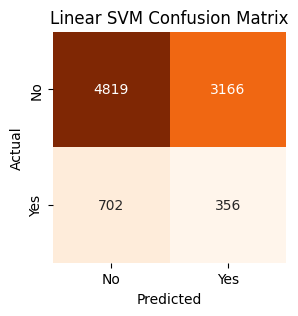

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Plot heatmap
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear SVM Confusion Matrix')
plt.show()


In [ ]:
# The test feature set is combined with the actual and predicted target values to facilitate inspection of model
# predictions. The first 10 rows are displayed for a quick overview.
test_results = X_test.copy()
test_results['Actual_y'] = y_test
test_results['Predicted_y'] = y_test_pred

print(test_results)


            age   balance  day  campaign     pdays  previous  pdays_contacted  \
1392   0.305556  0.078614    8  0.142857  0.000000  0.000000                0   
7518   0.361111  0.076235   30  0.142857  0.000000  0.000000                0   
12007  0.180556  0.076035   20  0.571429  0.000000  0.000000                0   
5536   0.250000  0.078750   23  0.428571  0.000000  0.000000                0   
29816  0.222222  0.090244    4  0.000000  0.000000  0.000000                0   
...         ...       ...  ...       ...       ...       ...              ...   
12636  0.111111  0.069780    4  0.000000  0.000000  0.000000                0   
13364  0.430556  0.080829    8  0.285714  0.000000  0.000000                0   
16102  0.194444  0.081555   22  0.142857  0.000000  0.000000                0   
42097  0.027778  0.072803    2  0.428571  0.209862  1.000000                1   
31033  0.291667  0.076099   11  0.000000  0.240826  0.333333                1   

       job_blue-collar  job

# <font color ="#2d3142">**10 Results and Model Comparison**
---

### <font color ="#427AA1">**Performance and Comparison of Models**

In [ ]:
import pandas as pd

# Create a dictionary with model results
model_comparison = {
    "Model": ["Decision Tree", "Random Forest", "Linear SVM"],
    "Test Accuracy": [0.8361, 0.8921, 0.5723],
    "Precision (Yes)": [0.30, 0.72, 0.10],
    "Recall (Yes)": [0.30, 0.13, 0.34],
    "F1-score (Yes)": [0.30, 0.22, 0.16],
    "Precision (No)": [0.91, 0.90, 0.87],
    "Recall (No)": [0.91, 0.99, 0.60],
    "F1-score (No)": [0.91, 0.94, 0.71],
    "Observations": [
        "Captures majority class well; fails on minority class. Simple and interpretable but biased toward 'No'.",
        "Best overall accuracy; handles majority class well; better precision for 'Yes' but recall still low. Ensemble approach reduces overfitting.",
        "Low overall accuracy; struggles with minority class and imbalanced data. Sensitive to high-dimensional one-hot encoding."
    ]
}

# Convert dictionary to DataFrame
comparison_df = pd.DataFrame(model_comparison)

# Display the table
comparison_df


,Model,Test Accuracy,Precision (Yes),Recall (Yes),F1-score (Yes),Precision (No),Recall (No),F1-score (No),Observations
0,Decision Tree,0.8361,0.30,0.30,0.30,0.91,0.91,0.91,Captures majority class well; fails on minorit...
1,Random Forest,0.8921,0.72,0.13,0.22,0.90,0.99,0.94,Best overall accuracy; handles majority class ...
2,Linear SVM,0.5723,0.10,0.34,0.16,0.87,0.60,0.71,Low overall accuracy; struggles with minority ...


### <font color = "#427AA1">**Discussion of Results**

**The objective of this analysis was to help the bank improve the efficiency of its marketing campaigns by identifying customers who are more likely to subscribe to a term deposit. The results provide important insights into how different models can support business decision-making.**

* **The Decision Tree model is effective at identifying customers who are unlikely to subscribe, which can help reduce unnecessary marketing calls and operational costs. However, its limited ability to identify actual subscribers reduces its usefulness for targeted marketing.**

* **The Random Forest model provides the best overall performance and the most reliable predictions. Its high precision for potential subscribers allows the bank to confidently focus marketing efforts on high-probability customers, improving resource allocation and campaign effectiveness. While some potential subscribers are still missed, this model offers the strongest balance between accuracy and practical business impact.**

* **The Linear SVM model performs poorly in comparison and offers limited business value due to inconsistent predictions caused by class imbalance and high-dimensional data.**

**Overall, the findings suggest that Random Forest is the most suitable model for deployment, enabling a more targeted, cost-effective, and data-driven marketing strategy. Further improvements can be achieved by addressing class imbalance to increase the identification of potential subscribers and maximize return on marketing investment.**